# Flipkart – Comparing Sales Performance Across States

## 📌 Problem Statement
Flipkart wants to compare the average **sales revenue** across five major states to identify if there is a significant difference in sales performance.

## 🧠 5W1H

- **What**: Sales revenue (₹)
- **Why**: To optimize marketing spend based on region-specific performance
- **When**: Last quarter's data
- **Where**: States: Maharashtra, Karnataka, Delhi, Gujarat, Tamil Nadu
- **Who**: 10,000 customers (2,000 per state)
- **How**: One-Way ANOVA (3+ groups)


In [3]:
import pandas as pd
import numpy as np

np.random.seed(2025)

n = 10000
states = ['Maharashtra', 'Karnataka', 'Delhi', 'Gujarat', 'Tamil Nadu']

df = pd.DataFrame({
    'Customer_ID': range(1, n+1),
    'State': np.random.choice(states, n, p=[0.2, 0.2, 0.2, 0.2, 0.2]),
})

# Simulate sales (Different mean sales per state)
df['Sales_Revenue'] = df['State'].apply(lambda x: 
    np.random.normal(loc=2000, scale=500) if x == 'Maharashtra' else
    np.random.normal(loc=1900, scale=450) if x == 'Karnataka' else
    np.random.normal(loc=1800, scale=400) if x == 'Delhi' else
    np.random.normal(loc=2100, scale=550) if x == 'Gujarat' else
    np.random.normal(loc=1950, scale=470)
)

df.head()


,Customer_ID,State,Sales_Revenue
0,1,Maharashtra,2203.808809
1,2,Tamil Nadu,1765.639752
2,3,Tamil Nadu,1913.908795
3,4,Delhi,998.440755
4,5,Karnataka,1989.154443


Customer_ID      0
State            0
Sales_Revenue    0
dtype: int64
State
Delhi          1810.025314
Gujarat        2103.203736
Karnataka      1884.723316
Maharashtra    2000.342639
Tamil Nadu     1932.275119
Name: Sales_Revenue, dtype: float64


C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_14428\742485562.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='State', y='Sales_Revenue', palette='Set3')


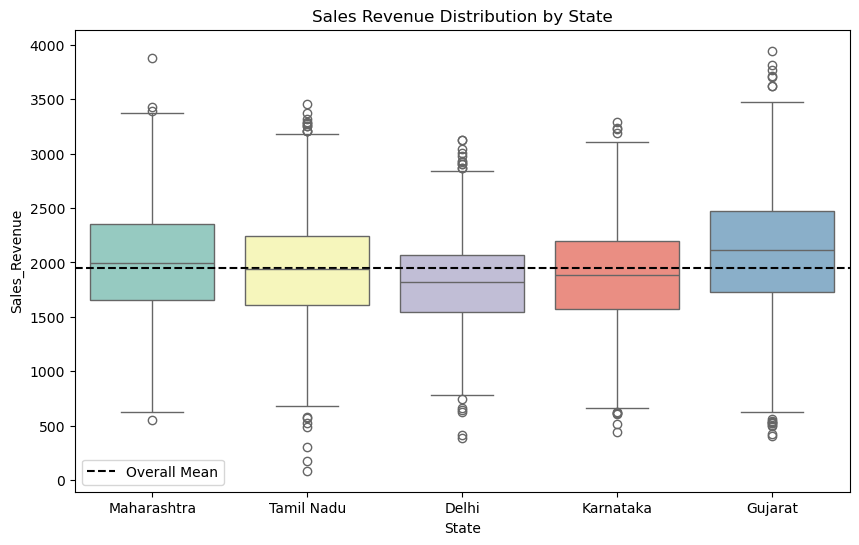

In [5]:
# Null check
print(df.isnull().sum())

# Sales mean by state
print(df.groupby('State')['Sales_Revenue'].mean())

# Boxplot for EDA
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='State', y='Sales_Revenue', palette='Set3')
plt.title('Sales Revenue Distribution by State')
plt.axhline(df['Sales_Revenue'].mean(), linestyle='--', color='black', label='Overall Mean')
plt.legend()
plt.show()


In [9]:
from scipy import stats

# ANOVA Test (one-way)
f_stat, p_val = stats.f_oneway(
    df[df['State'] == 'Maharashtra']['Sales_Revenue'],
    df[df['State'] == 'Karnataka']['Sales_Revenue'],
    df[df['State'] == 'Delhi']['Sales_Revenue'],
    df[df['State'] == 'Gujarat']['Sales_Revenue'],
    df[df['State'] == 'Tamil Nadu']['Sales_Revenue']
)

print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

F-Statistic: 112.4896
P-Value: 0.0000


## 🎯 Hypotheses

- H₀: μ_1 = μ_2 = μ_3 = μ_4 = μ_5 → All states have the same average sales
- H₁: At least one state has a different average sales

### 📈 Interpretation

- If **p < 0.05** → Reject H₀ → There’s a significant difference in sales across the states
- If **p ≥ 0.05** → Fail to reject H₀ → No significant difference in sales

## 💼 Business Impact

- ✅ If significant:
  - Focus marketing and sales efforts on the state(s) with the best performance (e.g., Gujarat)
  - Identify the underperforming states (e.g., Delhi) and adjust strategy
- ❌ If not significant:
  - Sales strategy may be region-agnostic; tweak your broader campaigns across states
